# Goal: To apply the skills for classifaction model in titanic competition at kaggle

Learning outcome: learn more data-analysis techniques through discussion

1. [Read the titanic dataset](#Read-the-titanic-dataset)  
2. [Know the data](#Know-the-data)
    1. [Peak-into-the-data](#Peaking-into-the-data)
    2. [Check-the-size-of-the-data](#Checking-the-size-of-the-data)
    3. [Identify-the-NaN-series-and-datatype](#Identifying-the-NaN-series-and-datatype)
    4. [descriptive-statistics](#Get-descriptive-statistics-on-number-datatype)
    5. [Categorize features into numerical, categorical and others](#Categorizing-features-into-Numerical,Categorical-and-Text)
3. [Explarotary Data analysis](#Exploratorty-Dataanalysis-findings:)
    1. [Identify Influence of outliers](#Identifying-the-influence-of-outliers-through-histograms)
4. Data preprocessing
    1. Setting-up Pipeline:
        1. [Setup numeric featurespipeline](#Setup-numeric-pipeline-for-preprocessing-numerical-features)
        
        2. [Setup Categorical features pipeline](#Setup-categorical-pipeline-for-categorical-features)
        3. [Setup full pipeline for data preprocessing](#Setup-full-pipeline-for-data-preprocessing-data)
 
6. Train and Validate the model:
    1. [Select the best Classification model for the data](#Choosing-the-best-Classification-model:)
    2. [Train the classification model](#Light-GBM)
7. Prediction:
    1. [Prediction](#Predicting-the-survival-of-titanic-passengers)







In [16]:
def converter(string):
    string=string.replace(" ","-")
    return string
string="# Choosing the best Classification model:"
converter(string)



'#-Choosing-the-best-Classification-model:'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import FunctionTransformer


# Read the titanic dataset

In [4]:
train_path="./train.csv"
test_path="./test.csv"

In [5]:
tit_data=pd.read_csv(train_path,index_col="PassengerId")
test_data=pd.read_csv(test_path,index_col="PassengerId")

In [6]:
test_data.shape

(418, 10)

# Know the data
Inferences:
1. The majority of passengers on board were in the upper-middle ticket class, with an average fare of &dollar; 32.2 and an approximate average age of 30 years.  
2. Out of the total 891 passengers, only 38.2% were able to survive the accident.  
3. The standard deviation of fare prices, amounting to &dollar; 49.69, indicates a significant disparity in ticket fares among the passengers, emphasizing the varying economic backgrounds.

## Peaking into the data

In [7]:
tit_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking the size of the data

In [8]:
tit_data.shape

(891, 11)

##  Identifying the NaN series and datatype

In [9]:
tit_data.info()
# age and cabin has the nan values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Get descriptive statistics on number datatypes

In [10]:
tit_data.describe()
#(or)
tit_data.describe(include=["number"])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Get descriptive statistics on object datatypes

In [11]:
tit_data.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Identifying the NaN entries and non-sensible entries among the features

In [12]:
tit_data[tit_data["Cabin"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


## Identifying zeros  in fare(assumption: fare cannot be zero)

In [13]:
features=tit_data.columns
(tit_data[features]==0).sum()

Survived    549
Pclass        0
Name          0
Sex           0
Age           0
SibSp       608
Parch       678
Ticket        0
Fare         15
Cabin         0
Embarked      0
dtype: int64

# Categorizing features into Numerical,Categorical and Text
titanic set has 12 features out of which

- Numerical features:  
  - continuous:
    1. Age     
    2. Fare
    
  - discrete:
    3. SibSip
    4. Parch

    
- Categorical features:
    1. Pclass  
    2. Sex  
    3. Embarked  
    4. Cabin: Since 204/891 are non null values, its better to not consider as we wont
               get a better model even if we did.
    5. Survived(Target feature)  
- Other/Text features:
    1. Name
    
    2. Ticket:This variable also only contains the unique ticket value for each passenger, and there is no pattern that we can extract. So, we'll just remove this variable.
    
    3. PassengerId: Since passenger id is of unique names and doesnt contribue to data analysis(interms of pattern), we ignore it 
    
    

# Exploratorty Dataanalysis findings:

In [14]:
import seaborn as sns

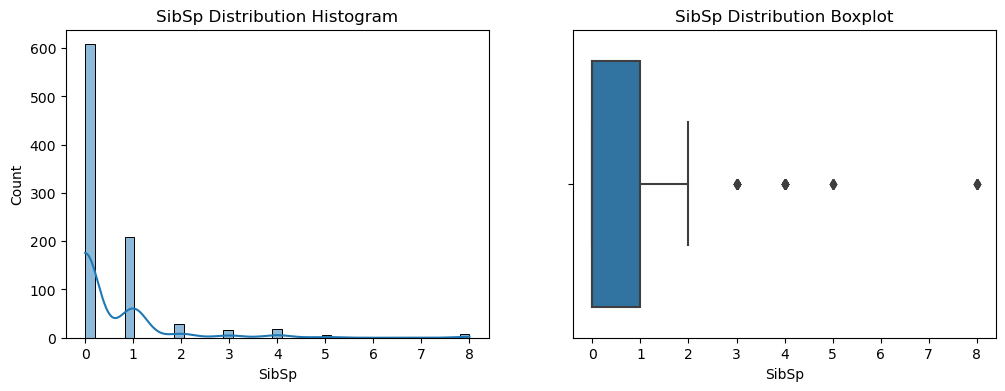

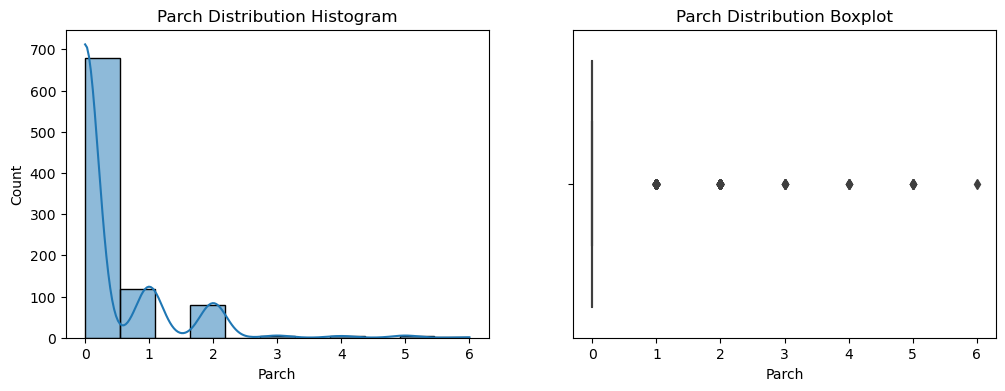

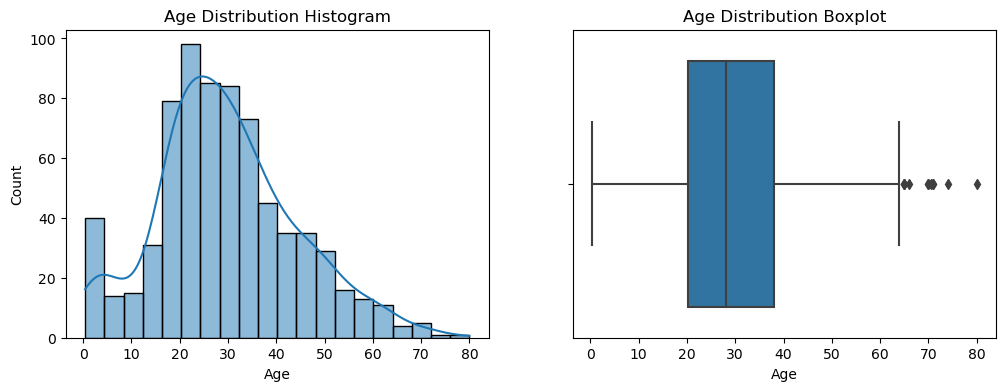

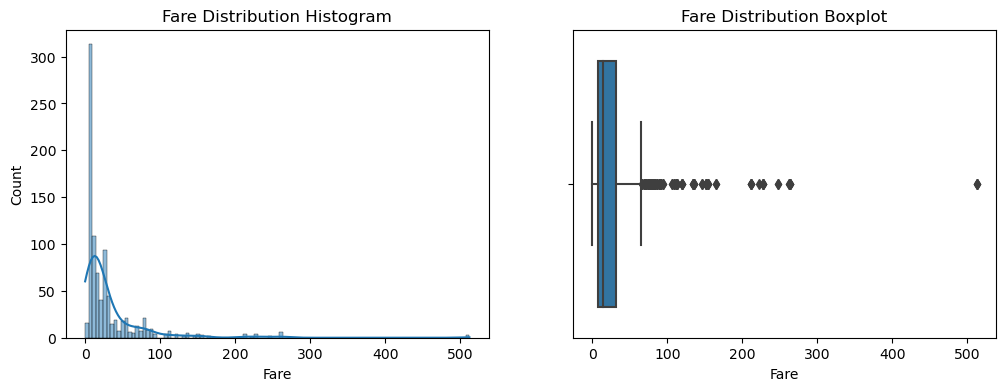

In [15]:
def num_dist(data, num_feature):
    fig, axis = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=num_feature, kde=True, ax=axis[0])
    sns.boxplot(data=data, x=num_feature, ax=axis[1])
    axis[0].set_title(f"{num_feature} Distribution Histogram")
    axis[1].set_title(f"{num_feature} Distribution Boxplot")

    plt.show()

num_features = ["SibSp", "Parch", "Age", "Fare"]
cat_features = ["Sex", "Embarked", "Pclass"]

for feature in num_features:
    num_dist(tit_data, feature)

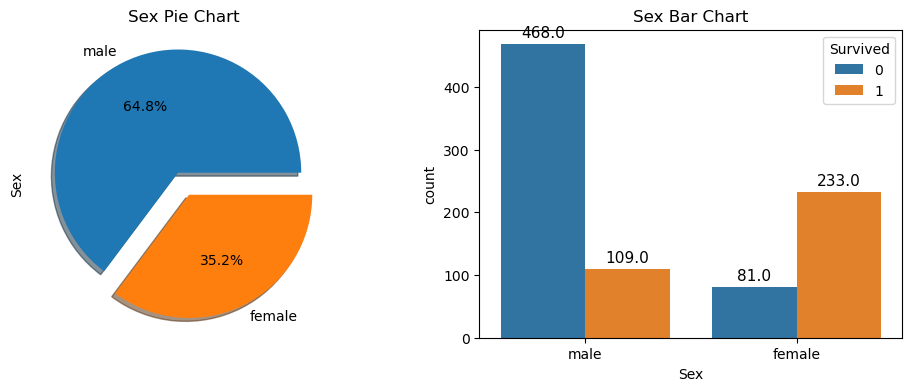

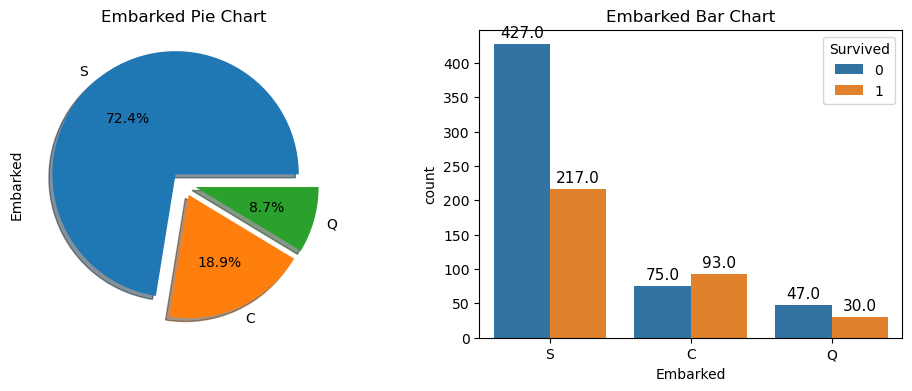

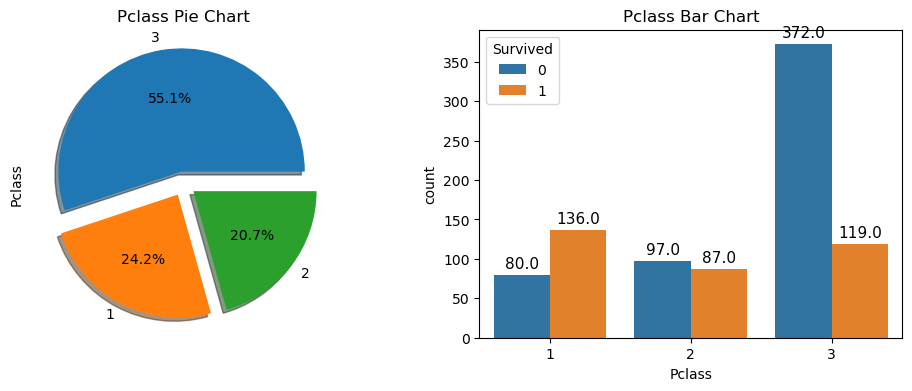

In [16]:
# represent categories through pie chart and 

def cat_dist(data, cat_feature):
    #  representing the categories through piechart
    fig, axis = plt.subplots(1, 2, figsize=(12, 4))
    data[cat_feature].value_counts().plot(kind="pie", 
                                          explode=[0.1]*(len(data[cat_feature].dropna().unique())),                                 ax=axis[0], 
                                          autopct='%0.1f%%',
                                          shadow=True)
    axis[0].set_title(f"{cat_feature} Pie Chart")
    
    # representing the numbers through countplot is a count on y and  feature on x bargraph
    count = sns.countplot(x=cat_feature,hue="Survived",data=data, ax=axis[1])
    for bar in count.patches:
            # x-coordinate: bar.get_x() + bar.get_width() / 2
            # y-coordinate: bar.get_height()
            # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      count.annotate(format(bar.get_height(),"0.1f"),
                   ((bar.get_x() + bar.get_width() / 2), bar.get_height()), 
                   ha='center', va='center',
                   size=11,xytext=(0, 8),
                   textcoords='offset points')
    axis[1].set_title(f"{cat_feature} Bar Chart")
    plt.show()

for cat_feature in cat_features:
    cat_dist(tit_data,cat_feature)

## Identifying the influence of outliers through histograms
- Age series has nan values.Since there are no significant outliers in the age from the distribution curve, we can replace the NnN withmean also if we replace with mean we can make it more homogeneous distribution curve at the age mean of 29.6 years.
- Cabin series which have only 204 non-null values.so we need not to consider Cabin series.


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

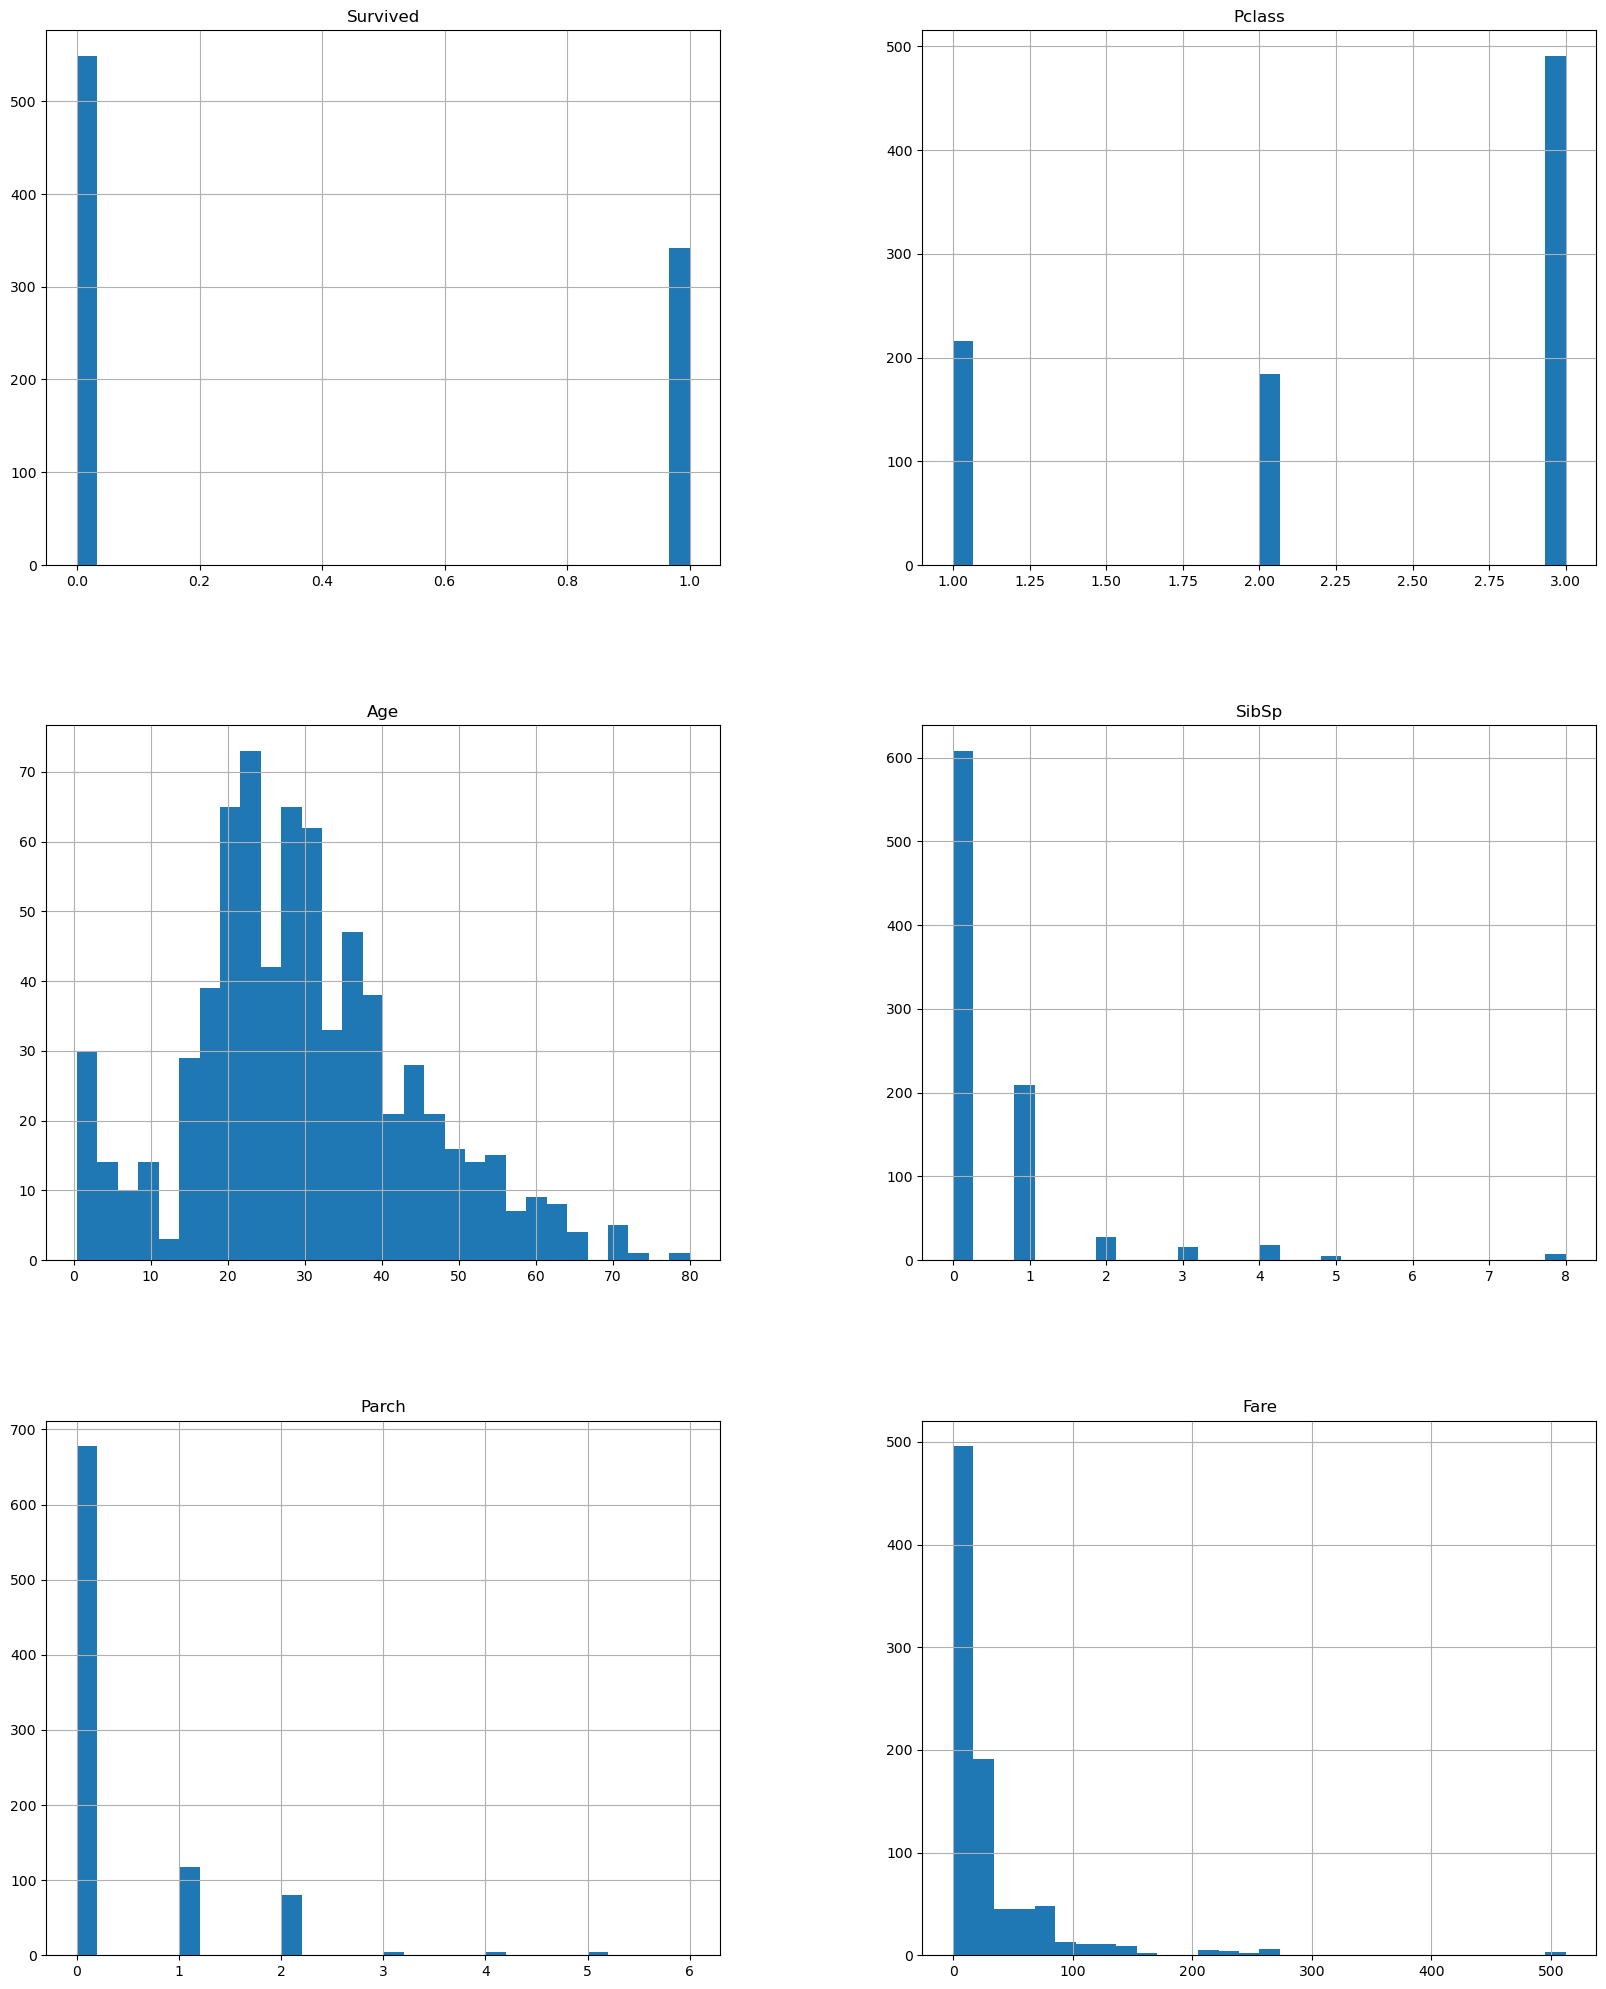

In [17]:
tit_data.hist(bins=30,figsize=(20,25))

In [18]:
correlation_mat=tit_data.corr()
correlation_mat["Survived"]

C:\Users\saiye\AppData\Local\Temp\ipykernel_10860\698477029.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat=tit_data.corr()


Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Parch'>,
        <Axes: xlabel='Parch', ylabel='Parch'>,
        <Axes: xlabel='Fare', ylabel='Parch'>],
       [<Axes: xlabel='Survived', ylabel='Fare'>,
        <Axes: xlabel='Parch', ylabel='Fare'>,
        <Axes: xlabel='Fare', ylabel='Fare'>]], dtype=object)

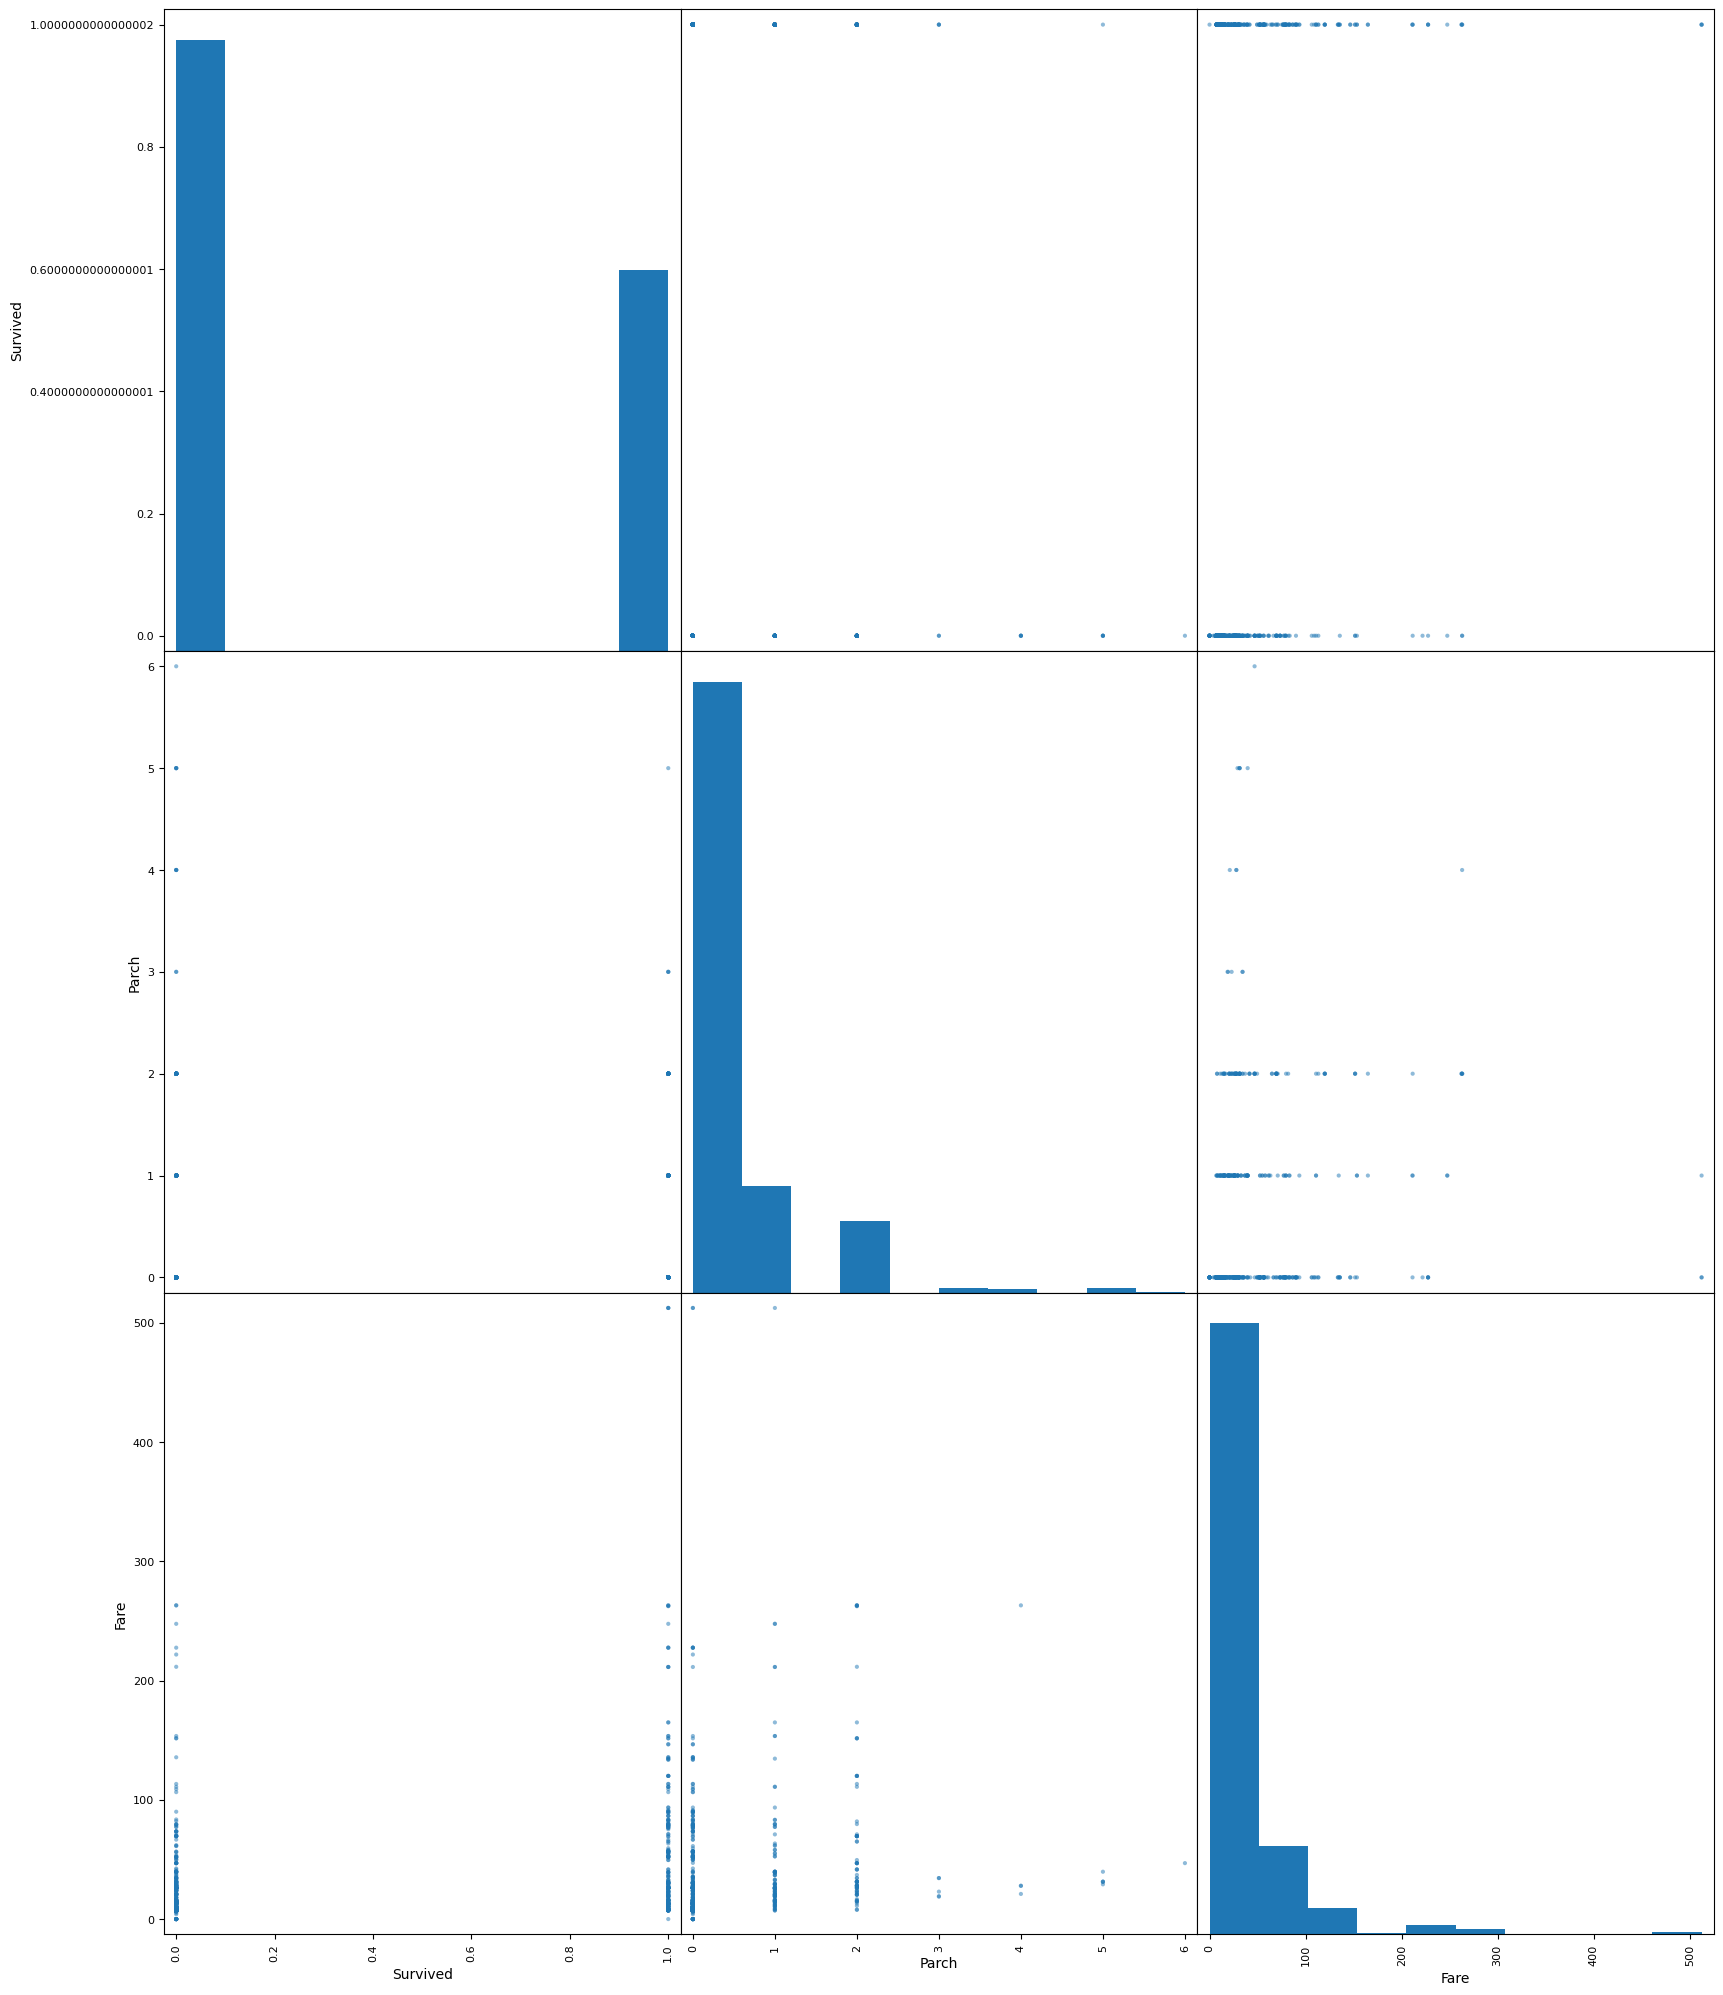

In [19]:
from pandas.plotting import scatter_matrix

attributes=["Survived","Parch","Fare"]
scatter_matrix(tit_data[attributes],figsize=(20,25))

In [20]:
survival_target=tit_data["Survived"]
train_data=tit_data.drop(["Survived"],axis=1)


# Data Preproecssing

## Cleaning the data: Handling the Missing Values

In [21]:

train_data[train_data["Age"].isnull()]


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...
860,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [22]:
num_train_data=train_data.drop(["Name","Sex","Ticket","Cabin","Embarked","Pclass"],axis=1)

In [23]:
from sklearn.preprocessing import FunctionTransformer

def replace_fare_zeros_with_nan(data):
    """
    Replace the zeros in fare series with nan values"""
    data1=data.copy()
    data1["Fare"]=data1["Fare"].replace(0,np.nan)
    return data1


In [24]:
def log_fare1(data):
    fare_col=3
    data1=data.copy()
    data1[fare_col]=np.log(data1[fare_col]+ 1e-6) 
    return data1
# expected output of fare after num_pipeline 
log_fare=num_train_data["Fare"].apply(lambda df: np.log(df))

In [25]:
from sklearn.base import BaseEstimator,TransformerMixin

from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted
#creating own StandardScalar transformer

class StandardScalerClone(BaseEstimator,TransformerMixin):
    def __init__(self,with_mean=True):
        self.with_mean=with_mean
        
    def fit(self,data,y=None):
        self.mean_=data.mean(axis=0)
        self.std_=data.std(axis=0)
        self.n_features_in_=data.shape[1]# every estimator stores self.n_features_in
        return self
        
    def transform(self,data):
        """Standardize the data by converting to numpy array"""
        # convert sparese/df to numpy array,checks input to be a 
        #non-empty 2d array target y is 1d arraty with finite values.
        check_is_fitted(self)
        data=check_array(data) 
        assert self.n_features_in_==data.shape[1]
        if self.with_mean:
            data=(data-self.mean_)
        return (data/self.std_)


# Setup numeric pipeline for preprocessing numerical features

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [27]:
num_train_data_attributes=num_train_data.columns
num_pipeline=Pipeline([
                        ("replace_fare_zeros",FunctionTransformer(replace_fare_zeros_with_nan)),
                        ("imputer",SimpleImputer(strategy="mean")),
                        ("fare_log",FunctionTransformer(log_fare1)),
                        ("scaler",StandardScalerClone())
                       ])


In [28]:
numpreprocessed_train_data=num_pipeline.fit_transform(num_train_data)

In [29]:
check_is_fitted(num_pipeline.named_steps["scaler"])

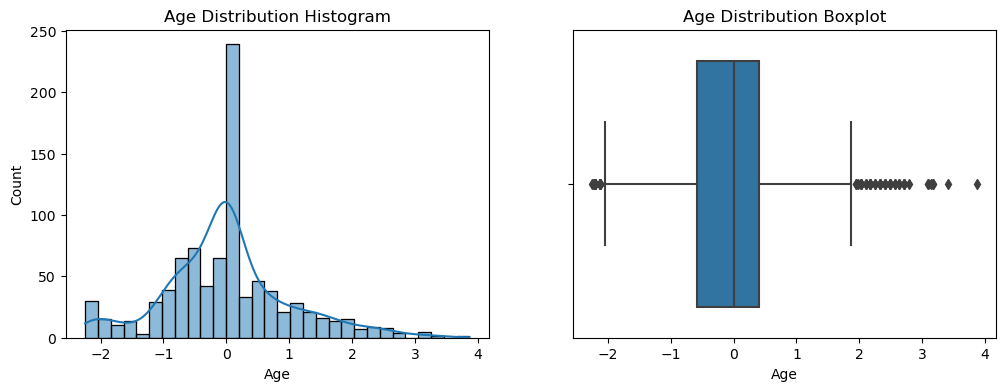

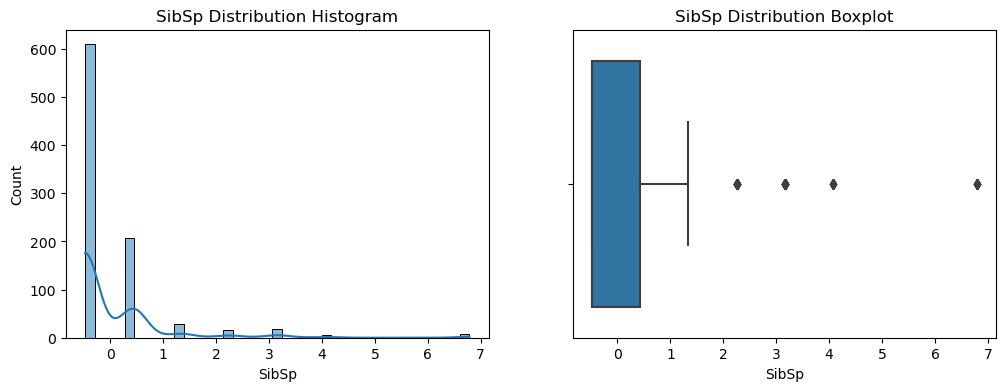

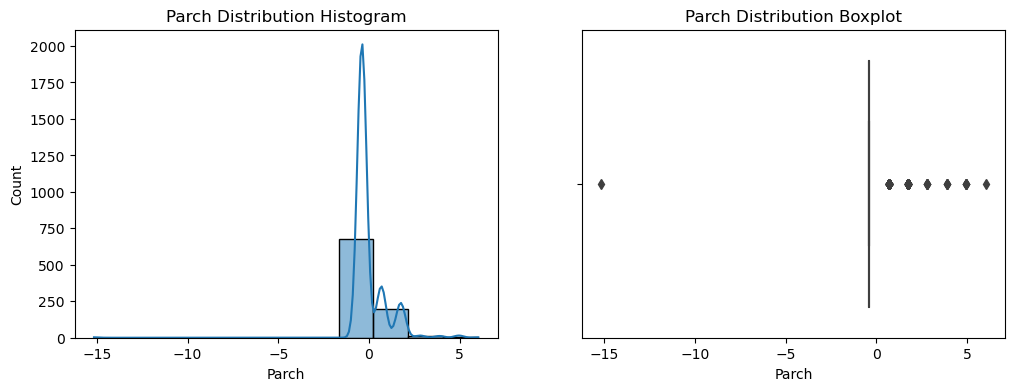

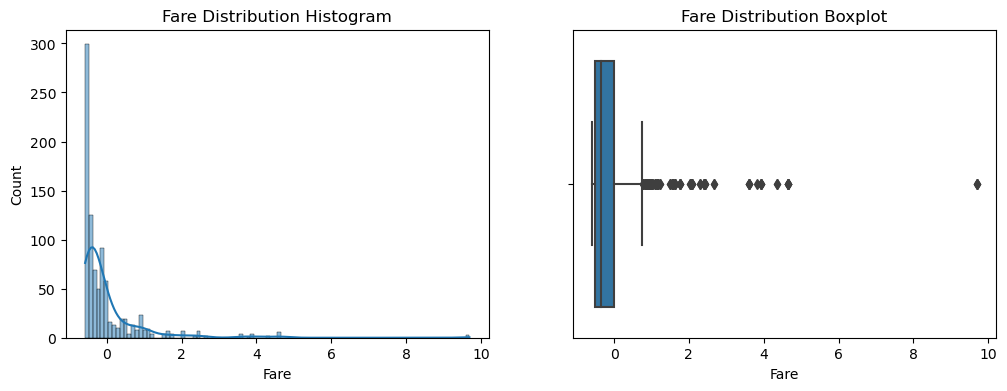

In [30]:
num_df=pd.DataFrame(numpreprocessed_train_data,columns=num_train_data.columns)
num_df.columns

for feature in num_df.columns:
    num_dist(num_df,feature)
    

In [31]:
# no null values in preprocessed data
num_df[num_df["Age"].isnull()]
# at  the same time all cols are scaled.

,Age,SibSp,Parch,Fare


<Axes: xlabel='Fare', ylabel='Count'>

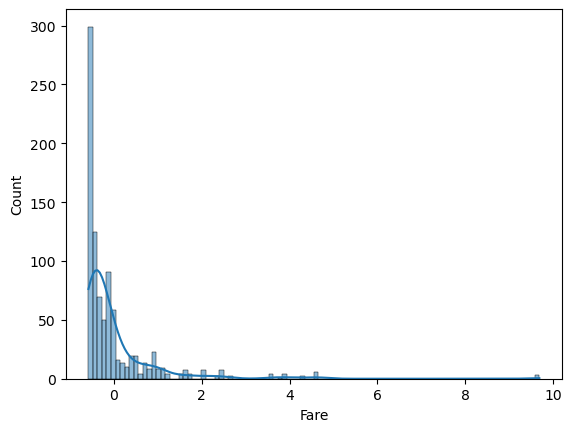

In [32]:
sns.histplot(data=num_df,kde=True, x="Fare")

In [33]:
num_pipeline

Pipeline(steps=[('replace_fare_zeros',
                 FunctionTransformer(func=<function replace_fare_zeros_with_nan at 0x00000191BC311000>)),
                ('imputer', SimpleImputer()),
                ('fare_log',
                 FunctionTransformer(func=<function log_fare1 at 0x00000191BC310820>)),
                ('scaler', StandardScalerClone())])

# Setup categorical pipeline for categorical features

In [34]:
cat_attribs=["Pclass","Sex","Embarked"]
cat_train_data=train_data[cat_attribs]
null_embarked=cat_train_data["Embarked"][cat_train_data["Embarked"].isnull()]


In [35]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline=Pipeline([
                    ("imputer",SimpleImputer(strategy="most_frequent")),
                    ("cat_encoder",OneHotEncoder())
                      ])

In [36]:
catpreprocessed_train_data=cat_pipeline.fit_transform(cat_train_data)
cat_pipeline.named_steps["cat_encoder"]

OneHotEncoder()

In [37]:
cat_pipeline.named_steps["cat_encoder"].categories_

[array([1, 2, 3], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
tot_list=[]
for arr in encoded_feature_names:
    tot_list=tot_list+list(arr)
tot_list

In [ ]:
catpreprocessed_train_data = cat_pipeline.fit_transform(cat_train_data)
encoded_feature_names = cat_pipeline.named_steps["cat_encoder"].categories_[0]
cat_df = pd.DataFrame(catpreprocessed_train_data.toarray(), columns=tot_list)
cat_df

# Setup full pipeline for data preprocessing data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
num_train_data_attributes=list(num_train_data.columns)
num_train_data_attributes

In [39]:
# inference: we havent considered name and ticket because it doesnt contribute much to our survival analysis.
# It only adds up more unique elements unnecessarily for categorical encoder.
# 204/891 travellers has only mentioned their cabin.remaining are nan values.So we cant infer much from that using the model
# So we could also ignore Cabin feature.
cat_attribs=["Pclass","Sex","Embarked"]
num_train_data_attributes=list(num_train_data.columns)
full_pipeline=ColumnTransformer([
                ("num",num_pipeline,num_train_data_attributes),
                ("cat",cat_pipeline,cat_attribs)
                ])

In [40]:
preprocessed_train_data=full_pipeline.fit_transform(train_data)

In [41]:
pd.DataFrame(preprocessed_train_data)


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.588487,0.433803,-0.391407,-0.514244,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.640115,0.433803,-0.391407,0.779590,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.281336,-0.473517,-0.391407,-0.500605,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-2.004807,-0.473516,-15.162409,-0.580475,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.409752,-0.473517,-0.391407,-0.498080,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.204549,-0.473517,-0.391407,-0.398062,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,-0.818849,-0.473517,-0.391407,-0.054566,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.002710,0.433803,1.746915,-0.186913,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,-0.281336,-0.473517,-0.391407,-0.054566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [42]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('replace_fare_zeros',
                                                  FunctionTransformer(func=<function replace_fare_zeros_with_nan at 0x00000191BC311000>)),
                                                 ('imputer', SimpleImputer()),
                                                 ('fare_log',
                                                  FunctionTransformer(func=<function log_fare1 at 0x00000191BC310820>)),
                                                 ('scaler',
                                                  StandardScalerClone())]),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder())]),
                                 ['Pclass', 'Sex', 'Embarked'])])

In [43]:
full_pipeline.get_params()

{'n_jobs': None,
 'remainder': 'drop',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('num',
   Pipeline(steps=[('replace_fare_zeros',
                    FunctionTransformer(func=<function replace_fare_zeros_with_nan at 0x00000191BC311000>)),
                   ('imputer', SimpleImputer()),
                   ('fare_log',
                    FunctionTransformer(func=<function log_fare1 at 0x00000191BC310820>)),
                   ('scaler', StandardScalerClone())]),
   ['Age', 'SibSp', 'Parch', 'Fare']),
  ('cat',
   Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                   ('cat_encoder', OneHotEncoder())]),
   ['Pclass', 'Sex', 'Embarked'])],
 'verbose': False,
 'verbose_feature_names_out': True,
 'num': Pipeline(steps=[('replace_fare_zeros',
                  FunctionTransformer(func=<function replace_fare_zeros_with_nan at 0x00000191BC311000>)),
                 ('imputer', SimpleImputer()),
                 ('fare_log',
 

# train and validate the model

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [45]:
model=DecisionTreeRegressor()

In [46]:
model.fit(preprocessed_train_data,survival_target)

DecisionTreeRegressor()

# Validating DecisionTreeRegressor model through root mean squared error

In [47]:
survival_pred_tree=model.predict(preprocessed_train_data)
mse=mean_squared_error(survival_target,survival_pred_tree)
rmse=np.sqrt(mse)
rmse

0.10384490147109458

In [49]:
fit_accuracy=(survival_pred_tree==survival_target).mean()
fit_accuracy

0.9405162738496072

In [50]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(model,preprocessed_train_data,survival_target,
                       scoring="neg_mean_squared_error",cv=10)

rmse_scores=np.sqrt(-scores)
rmse_scores


array([0.49253689, 0.41673949, 0.50052641, 0.52377912, 0.43424678,
       0.4055423 , 0.43481046, 0.47993445, 0.44771929, 0.44007291])

# RandomForestRegressor()

In [51]:
forest_reg=RandomForestRegressor()
forest_reg.fit(preprocessed_train_data,survival_target)


RandomForestRegressor()

In [52]:
survival_pred_forest=forest_reg.predict(preprocessed_train_data)
survival_pred_forest

array([0.07166667, 0.99      , 0.7       , 0.99      , 0.        ,
       0.031     , 0.07      , 0.13      , 0.89      , 1.        ,
       0.91      , 0.9       , 0.06708333, 0.01      , 0.21      ,
       0.92      , 0.07      , 0.62      , 0.3       , 0.97      ,
       0.00125   , 0.32063492, 0.77      , 0.88      , 0.07      ,
       0.74      , 0.00166667, 0.19      , 0.99      , 0.        ,
       0.18      , 0.96      , 0.86985394, 0.18      , 0.25      ,
       0.25      , 0.12142965, 0.        , 0.06      , 0.73      ,
       0.06      , 0.4       , 0.04125   , 0.96      , 0.84      ,
       0.        , 0.02      , 0.86985394, 0.21      , 0.11      ,
       0.04      , 0.18      , 1.        , 1.        , 0.04      ,
       0.68      , 0.95133333, 0.21119048, 0.96      , 0.        ,
       0.29      , 0.99      , 0.07666667, 0.1       , 0.04666667,
       0.86      , 1.        , 0.19183333, 0.79      , 0.0675    ,
       0.045     , 0.03      , 0.03      , 0.11      , 0.9525 

In [53]:
mean_squared_error(survival_pred_forest,survival_target)

0.02743510489716387

In [54]:
from sklearn.model_selection import cross_val_score

forest_scores=cross_val_score(forest_reg,preprocessed_train_data,survival_target,
               scoring="neg_mean_squared_error",cv=10)
forest_rsme=np.sqrt(-forest_scores)
                
forest_rsme.mean()
    
                

0.37817524287441584

# Logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(preprocessed_train_data,survival_target)

LogisticRegression()

In [56]:
log_pred=log_reg.predict(preprocessed_train_data)
scores=cross_val_score(log_reg,preprocessed_train_data,survival_target,
               scoring="neg_mean_squared_error",cv=10)
log_reg_rsme=np.sqrt(-scores)
log_reg_rsme.mean()

0.4445659938297819

# Choosing the best Classification model:

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate, GridSearchCV

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix


In [58]:
classifier = {
    "KNN": KNeighborsClassifier(),
    "LR": LogisticRegression(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(),
    "XGB": XGBClassifier(),
    "LBM": LGBMClassifier(),
    "SGD": SGDClassifier()
}

results_list=[]

for name, model in classifier.items():
    cv_results = cross_validate(
        model, preprocessed_train_data, survival_target,
        cv=10, scoring=["accuracy", "f1"]
    )
    df=pd.DataFrame({"classifier":name,
                    "avg_accuracy":cv_results["test_accuracy"],
                    "f1_accuracy":cv_results["test_f1"]})
    results_list.append(df)
                
results_df=pd.concat(results_list)
results_df["overall_accuracy"] = (results_df["avg_accuracy"] + results_df["f1_accuracy"]) / 2


In [60]:
sorted_results=results_df.sort_values(by=["overall_accuracy"],ascending=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


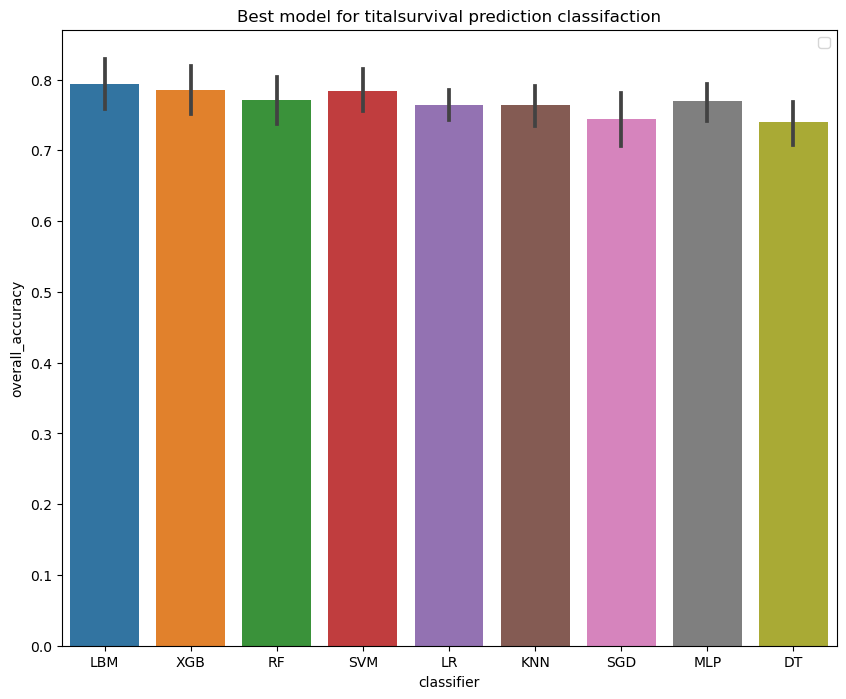

In [62]:
fig,axis=plt.subplots(figsize=(10,8))
axis.set(xlabel="Classfication model",ylabel="Overall accuracy",title="Best model for titalsurvival prediction classifaction")

sns.barplot(data=sorted_results,x=sorted_results["classifier"],y=sorted_results["overall_accuracy"],
           ax=axis)

axis.legend(loc="upper right")




# Light GBM

In [ ]:
lbm_clf=LGBMClassifier()

In [ ]:
lbm_clf.fit(preprocessed_train_data,survival_target)

In [ ]:
preprocessed_test_data=full_pipeline.fit_transform(test_data)

In [540]:
survival_test_data=lbm_clf.predict(preprocessed_test_data)

# Finetuning the model:



In [475]:
from sklearn.model_selection import GridSearchCV

param_grid=[{"n_estimators":[120,150,170],"max_features":[2,5,7,15,20]}]

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
            scoring="neg_mean_squared_error")
grid_search.fit(preprocessed_train_data,survival_target)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 5, 7, 15, 20],
                          'n_estimators': [120, 150, 170]}],
             scoring='neg_mean_squared_error')

In [437]:
grid_search.best_estimator_

RandomForestRegressor(max_features=5, n_estimators=150)

In [438]:
grid_search.cv_results_

{'mean_fit_time': array([0.14060359, 0.15520024, 0.16001654, 0.14396591, 0.1797379 ,
        0.1821918 , 0.14345393, 0.18263993, 0.23505044, 0.18741546,
        0.22652159, 0.24473186, 0.18247533, 0.22195234, 0.26124125]),
 'std_fit_time': array([0.03264348, 0.01218227, 0.00698252, 0.01393935, 0.00918819,
        0.01102927, 0.01672429, 0.02721366, 0.0056528 , 0.01365391,
        0.00531862, 0.00707061, 0.00906949, 0.01734491, 0.014437  ]),
 'mean_score_time': array([0.00412269, 0.00555358, 0.01381764, 0.00613236, 0.01032743,
        0.01347423, 0.00786424, 0.00654612, 0.0112896 , 0.00345273,
        0.00470042, 0.01244121, 0.00187836, 0.00558195, 0.00290804]),
 'std_score_time': array([0.00606458, 0.00461773, 0.00720926, 0.00754496, 0.00118064,
        0.00316682, 0.0075723 , 0.00670023, 0.00649364, 0.00309858,
        0.00510685, 0.00623975, 0.00243951, 0.0056553 , 0.00238475]),
 'param_max_features': masked_array(data=[2, 2, 2, 5, 5, 5, 7, 7, 7, 15, 15, 15, 20, 20, 20],
            

In [439]:
results=grid_search.cv_results_

In [440]:
for mean_error_scores,params in zip(results["mean_test_score"],results["params"]):
    print(np.sqrt(-mean_error_scores),params)


0.3822436430774146 {'max_features': 2, 'n_estimators': 120}
0.3825849418235615 {'max_features': 2, 'n_estimators': 150}
0.38056572683524165 {'max_features': 2, 'n_estimators': 170}
0.3800182187117001 {'max_features': 5, 'n_estimators': 120}
0.37855130509034446 {'max_features': 5, 'n_estimators': 150}
0.37952357598631625 {'max_features': 5, 'n_estimators': 170}
0.3800297133449668 {'max_features': 7, 'n_estimators': 120}
0.37986814586656237 {'max_features': 7, 'n_estimators': 150}
0.38042780198016346 {'max_features': 7, 'n_estimators': 170}
0.3816893048746612 {'max_features': 15, 'n_estimators': 120}
0.3823530073869947 {'max_features': 15, 'n_estimators': 150}
0.38182663123368527 {'max_features': 15, 'n_estimators': 170}
0.3840175252480597 {'max_features': 20, 'n_estimators': 120}
0.3821750116920655 {'max_features': 20, 'n_estimators': 150}
0.3841301842843888 {'max_features': 20, 'n_estimators': 170}


# Estimating feature importance

In [441]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([0.25291715, 0.04670055, 0.03241516, 0.24201589, 0.02498374,
       0.0127891 , 0.06320912, 0.14196811, 0.1497675 , 0.01155695,
       0.0076697 , 0.01400703])

In [442]:
encoder=cat_pipeline.named_steps["cat_encoder"]
cat_uniques=encoder.categories_

num_attribs=num_train_data_attributes
cat_attribs=[]
for col in range(len(cat_uniques)):
    cat_attribs=cat_attribs+list(cat_uniques[col])
tot_attribs=num_attribs+cat_attribs

sorted(zip(feature_importances, tot_attribs), reverse=True)


[(0.2529171494506641, 'Age'),
 (0.24201588750798378, 'Fare'),
 (0.1497675020982731, 'male'),
 (0.1419681083030455, 'female'),
 (0.06320911667151004, 3),
 (0.04670055464720687, 'SibSp'),
 (0.03241516203919861, 'Parch'),
 (0.024983742514252654, 1),
 (0.01400702921829983, 'S'),
 (0.012789099707298567, 2),
 (0.011556948402238285, 'C'),
 (0.007669699440028665, 'Q')]

In [443]:
cat_uniques

[array([1, 2, 3], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [444]:
full_pipeline.get_params()

{'n_jobs': None,
 'remainder': 'drop',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('num',
   Pipeline(steps=[('replace_fare_zeros',
                    FunctionTransformer(func=<function replace_fare_zeros_with_nan at 0x000001D007838670>)),
                   ('imputer', SimpleImputer()),
                   ('fare_log',
                    FunctionTransformer(func=<function log_fare1 at 0x000001D00DFF4D30>)),
                   ('scaler', StandardScaler())]),
   ['Age', 'SibSp', 'Parch', 'Fare']),
  ('cat',
   Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                   ('cat_encoder', OneHotEncoder())]),
   ['Pclass', 'Sex', 'Embarked'])],
 'verbose': False,
 'verbose_feature_names_out': True,
 'num': Pipeline(steps=[('replace_fare_zeros',
                  FunctionTransformer(func=<function replace_fare_zeros_with_nan at 0x000001D007838670>)),
                 ('imputer', SimpleImputer()),
                 ('fare_log',
      

In [445]:
preprocessed_test_data=full_pipeline.fit_transform(test_data)

In [446]:
pd.DataFrame(preprocessed_test_data)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.337676,-0.365160,-0.299165,-0.501623,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.322931,0.516194,-0.299165,-0.516502,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2.505237,-0.365160,-0.299165,-0.468276,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-2.121849,-12.541521,-11.802653,-0.603371,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.647579,0.516194,0.533485,-0.421621,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.004470,-0.365160,-0.299165,-0.497660,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
414,0.692368,-0.365160,-0.299165,1.312041,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
415,0.652958,-0.365160,-0.299165,-0.512016,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
416,0.004470,-0.365160,-0.299165,-0.497660,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Predicting the survival of titanic passengers

In [468]:
model=log_reg
survival_test_data=model.predict(preprocessed_test_data)

In [469]:
survival_test_data

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [541]:
passengerid=np.array(test_data.index)
survival_pred=np.c_[passengerid,survival_test_data]
survival_pred.shape

(418, 2)

In [542]:
survival_test_df=pd.DataFrame(survival_pred,columns=["Passengerid","Survived"])
survival_test_df

,Passengerid,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [543]:
survival_test_df.dtypes


Passengerid    int64
Survived       int64
dtype: object

# Converting a dataframe back to csv file

In [544]:
survival_test_df.to_csv("titanic_survival_predictions.csv",index=False)

In [545]:
pd.read_csv("titanic_survival_predictions.csv")

,Passengerid,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
